## Homework 2: Classifying Digits

Cassia Cai
fmc2855@uw.edu

#### Goal: train a classifier to distinguish images of handwritten digits from the famous MNIST data set
This is a classic problem in machine learning and often times one of the first benchmarks one tries new algorithms on.

The data set is split into training and test sets. You will train your classifiers using the training set while the test set is only used for validation/evaluation of your classifiers. The data sets are MNIST_training_set.py and MNIST_test_set.py (python binaries).

The training set contains 2000 instances of handwritten digits, the “features” are 16 × 16 black and white images while the “labels” are the corresponding digit (note the images are shaped as vectors of size 256 and need to be reshaped for visualization). The test set has the same attributes except that there are only 500 instances.

In [348]:
#  ------------------ import necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [349]:
#  ------------------ load training and test sets 
path_to_train = 'MNIST_training_set.npy'
path_to_test = 'MNIST_test_set.npy'

d_train = np.load(path_to_train, allow_pickle=True)
d_test = np.load(path_to_test, allow_pickle=True)

In [350]:
X_train = d_train.item().get('features')
Y_train = d_train.item().get('labels')

print(X_train.shape)
print(Y_train.shape)

X_test = d_test.item().get('features')
Y_test = d_test.item().get('labels')

print(X_test.shape)
print(Y_test.shape)

(2000, 256)
(2000,)
(500, 256)
(500,)


[1. 1. 1. 6. 0. 4. 9. 9. 3. 7. 1. 8. 3. 8. 7. 4. 3. 4. 0. 2. 5. 6. 2. 6.
 0. 0. 9. 0. 8. 1. 2. 7. 9. 7. 4. 5. 2. 4. 9. 3. 3. 1. 8. 8. 6. 4. 6. 3.
 0. 3. 1. 1. 7. 8. 9. 4. 0. 7. 7. 0. 0. 7. 2. 6.]


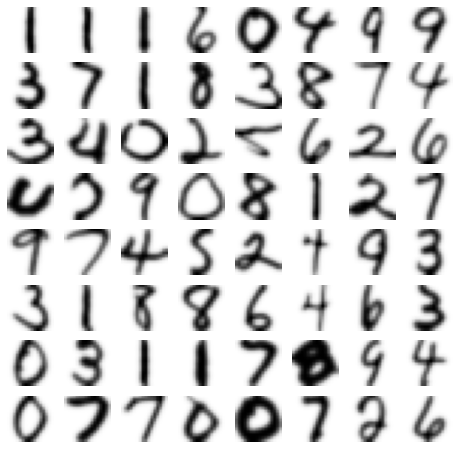

In [351]:
# Plot some of the training and test sets 

def plot_digits(XX, N):  #def plot_digits(XX, N, title): 
    """Small helper function to plot N**2 digits."""
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    for i in range(N):
        for j in range(N):
            ax[i,j].imshow(XX[(N)*i+j,:].reshape((16, 16)), cmap="Greys")
            ax[i,j].axis("off")
            # fig.suptitle(title, fontsize=24)

# plot_digits(X_train, 8, "First 64 Training Features" )
plot_digits(X_train, 8)
plt.savefig('first64_training_features.pdf')

print(Y_train[0:8**2])

In [352]:
# using sklearn

# --- 
# Pointer: sklearn has functionalities for PCA and Ridge regression with crossvalidation. 
# Using these can make your life much easier.
# --- 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [353]:
mean_data = np.mean(X_train,0)
centered_X_train = X_train - mean_data

# X_train_standard = StandardScaler().fit_transform(centered_X_train)

pca = PCA(n_components = 256)
pca.fit(centered_X_train) #X_train_standard

components = pca.components_
print(components[:16,:].shape)

(16, 256)


#### Task 1: Use PCA to investigate the dimensionality of X_train and plot the first 16 modes

In [354]:
#### Explained variance, explained variance ratio, singular values
# -------------------------------------------
# From documentation:

# explained_variance_ : array, shape (n_components,) The amount 
# of variance explained by each of the selected components.

# explained_variance_ratio_ : array, shape (n_components,) Percentage 
# of variance explained by each of the selected components.

# singular_values_ndarray of shape (n_components,)
# The singular values corresponding to each of the selected components. 
# The singular values are equal to the 2-norms of the n_components 
# variables in the lower-dimensional space.

# -------------------------------------------

nuclear_norm = np.linalg.norm(pca.singular_values_) # is the sum of singular singulars
sv_scaled = pca.singular_values_**2/(nuclear_norm**2) 
# sv_scaled = pca.explained_variance_ratio_
sv_total = np.cumsum(pca.singular_values_**2)/(nuclear_norm**2)

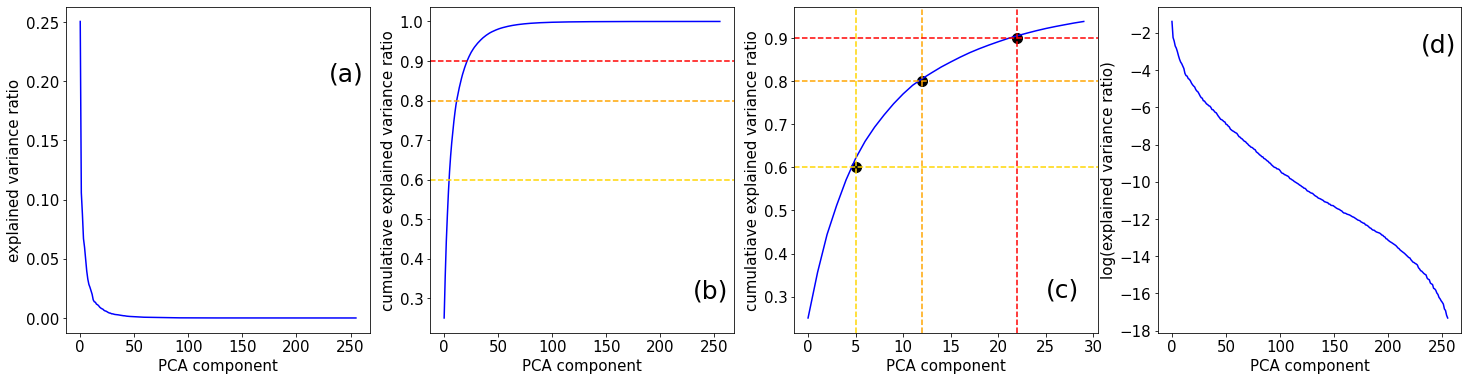

In [355]:
# -- Plot the singular values
plt.rcParams["figure.figsize"] = (25,6)

plt.subplot(1, 4, 1)
plt.plot(sv_scaled, 'blue') # equivalent to pca.explained_variance_ratio_
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('PCA component', fontsize=15)
plt.ylabel('explained variance ratio', fontsize=15)
plt.text(230, 0.20, '(a)', fontsize=25)

plt.subplot(1, 4, 2)
plt.plot(sv_total, 'blue')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.axhline(y=0.60,color='black',linestyle = '--',c='gold')
plt.axhline(y=0.80,color='black',linestyle = '--', c='orange')
plt.axhline(y=0.90,color='black',linestyle = '--',c='red')

plt.xlabel('PCA component', fontsize=15)
plt.ylabel('cumulatiave explained variance ratio', fontsize=15)
plt.text(230, 0.3, '(b)', fontsize=25)

plt.subplot(1, 4, 3)
plt.plot(sv_total[:30], 'blue')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.axhline(y=0.60,color='black',linestyle = '--',c='gold')
plt.axvline(x=5,color='black',linestyle = '--',c='gold')

plt.axhline(y=0.80,color='black',linestyle = '--', c='orange')
plt.axvline(x=12,color='black',linestyle = '--', c='orange')

plt.axhline(y=0.90,color='black',linestyle = '--',c='red')
plt.axvline(x=22,color='black',linestyle = '--',c='red')

plt.xlabel('PCA component', fontsize=15)
plt.ylabel('cumulatiave explained variance ratio', fontsize=15)
plt.text(25, 0.3, '(c)', fontsize=25)
plt.scatter([5,12,22],[0.6,0.8,0.9],s=100,c='k')

plt.subplot(1, 4, 4)
plt.plot(np.log(sv_scaled),'blue') # equivalent to np.log(pca.singular_values_)
# plt.plot(np.log(pca.singular_values_))
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('PCA component', fontsize=15)
plt.ylabel('log(explained variance ratio)', fontsize=15)
plt.text(230, -3, '(d)', fontsize=25)

plt.savefig('task1fig1.pdf')
plt.show()

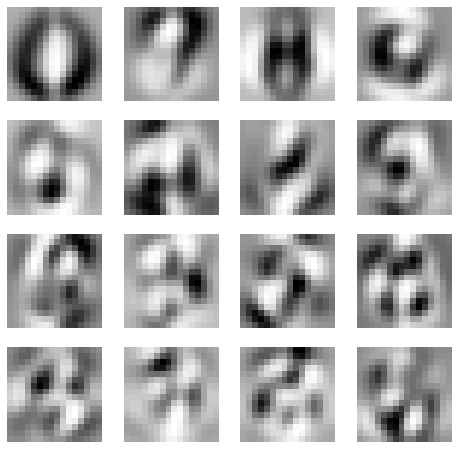

In [356]:
# plot_digits(components[:16,:], 4, "First 16 PCA Modes" )
plot_digits(components[:16,:], 4)
plt.savefig('task1fig2.pdf')

#### Task 2: How many PCA modes do you need to keep in order to approximate X_train up to 60%, 80% and 90% in the Frobenius norm?

In [357]:
pca_total = PCA(n_components=256)
pca_total.fit(X_train)
frobenius_norm = np.sqrt(sum(pca_total.singular_values_**2))

In [358]:
def no_pca_modes(ratio):
    pca_test = PCA(n_components=1)
    pca_test.fit(X_train)
    np.sqrt(sum(pca_test.singular_values_**2))
    i = 1
    while np.sqrt(sum(pca_test.singular_values_**2)) < ratio*frobenius_norm:
        i += 1
        pca_test = PCA(n_components=i)
        pca_test.fit(X_train)
    return i

print('Number of PCA modes to keep to approximate X_train up to 60%: ', no_pca_modes(0.6))
print('Number of PCA modes to keep to approximate X_train up to 80%: ',no_pca_modes(0.8))
print('Number of PCA modes to keep to approximate X_train up to 90%: ',no_pca_modes(0.9))

Number of PCA modes to keep to approximate X_train up to 60%:  3
Number of PCA modes to keep to approximate X_train up to 80%:  7
Number of PCA modes to keep to approximate X_train up to 90%:  14


In [359]:
# alternative method
pca = PCA((.6)**2)
pca.fit(X_train_standard)
components = pca.components_
print(components.shape) 

pca = PCA((.8)**2)
pca.fit(X_train_standard)
components = pca.components_
print(components.shape) 

pca = PCA((.9)**2)
pca.fit(X_train_standard)
components = pca.components_
print(components.shape) 

(3, 256)
(8, 256)
(16, 256)


#### Task 3: Train classifier

In [360]:
def extract_feat_lab(a,b,X,Y):
    ''' ----------------------------------------
    a function that extracts the features and labels of the 
    2 digits from the data set and sets those 
    values to either 1 or -1
    
    Pointer: This is done to make the output of your classifier normalized 
    and is common practice in binary classification where we wish to 
    distinguish only two classes in a data set.
    
    -----------------------------------------'''
    label_a = np.where(Y == a)
    label_b = np.where(Y == b)
    
    label_a = label_a[0]
    label_b = label_b[0]
    
    feature_a = X[label_a,:]
    feature_b = X[label_b,:]
    
    feature_a_b = np.append(feature_a, feature_b, axis=0)
    label_a_b = np.append(np.full((1,len(label_a)),a), np.full((1,len(label_b)),b))

    label_a_b = np.where(label_a_b == a, -1, label_a_b)
    label_a_b = np.where(label_a_b == b, 1, label_a_b)
    
    return feature_a_b, label_a_b

def calculate_MSE(predicted_array, actual_labels):
    ''' ----------------------------------------
    a function that calculates the mean squared error
    of the predicted labels and the actual labels
    -----------------------------------------'''
    MSE = (1/len(predicted_array))*np.linalg.norm(predicted_array - actual_labels)**2
    return MSE

In [361]:
from sklearn.linear_model import RidgeCV

def compare_MSEtest_MSEtrain(no_comp, digit_1, digit_2, X_train, Y_train, X_test, Y_test):
    pca = PCA(no_comp); pca.fit(X_train)

    X_dig_train, Y_dig_train = extract_feat_lab(digit_1, digit_2, X_train, Y_train)
    A_train = pca.transform(X_dig_train)
    b_train = Y_dig_train

    MNIST_binary_ridge = RidgeCV(alphas=(0.01,0.1,1), cv=5) #alternative: MNIST_binary_ridge = linear_model.Ridge(0.1)
    MNIST_binary_ridge.fit(A_train, b_train)
    
    # beta = np.insert(MNIST_binary_ridge.coef_, 0, MNIST_binary_ridge.intercept_) # not sure if we need beta (see questions)

    classes_train_pred = MNIST_binary_ridge.predict(A_train)
    MSE_train = calculate_MSE(classes_train_pred,b_train)

    X_dig_test, Y_dig_test = extract_feat_lab(digit_1, digit_2, X_test, Y_test)
    A_test = pca.transform(X_dig_test)
    
    b_test = Y_dig_test
    
    classes_test_pred = MNIST_binary_ridge.predict(A_test)
    classes_test_pred_binary = np.sign(MNIST_binary_ridge.predict(A_test))
    MSE_test = calculate_MSE(classes_test_pred,b_test)

    return MSE_train, MSE_test, classes_test_pred_binary, b_test

In [362]:
## -- digits 1 and 8
MSE_train, MSE_test, classes_test_pred_binary, b_test = compare_MSEtest_MSEtrain(16, 1, 8, X_train, Y_train, X_test, Y_test)
print('MSE for training data: ',MSE_train)
print('MSE for testing data:  ',MSE_test)

MSE for training data:  0.07461131649782166
MSE for testing data:   0.08328651138534204


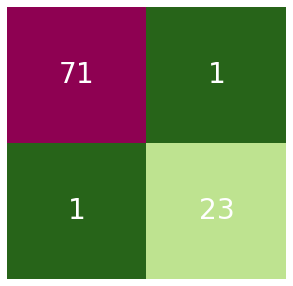

In [363]:
from sklearn.metrics import confusion_matrix

CM_18 = confusion_matrix(b_test, classes_test_pred_binary)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.imshow(CM_18, interpolation = 'none', aspect = 'auto', cmap = 'PiYG_r')
ax1.axis('off')
for (j,i),label in np.ndenumerate(CM_18):
    ax1.text(i,j,label,ha='center', va='center', color='white', size=28)

plt.show()

#### Task 4: Train classifiers for the pairs of digits (3,8) and (2,7)

In [364]:
## -- digits 3 and 8
MSE_train, MSE_test,classes_test_pred_binary, b_test = compare_MSEtest_MSEtrain(16, 3, 8, X_train, Y_train, X_test, Y_test)
print('MSE for training data: ',MSE_train)
print('MSE for testing data:  ',MSE_test)

MSE for training data:  0.1804077490922206
MSE for testing data:   0.25815882749551244


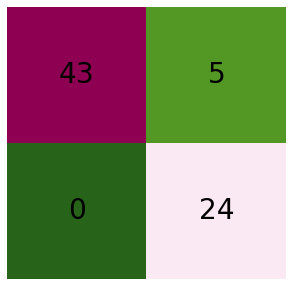

In [365]:
CM_38 = confusion_matrix(b_test, classes_test_pred_binary)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.imshow(CM_38, interpolation = 'none', aspect = 'auto', cmap = 'PiYG_r')
ax1.axis('off')
for (j,i),label in np.ndenumerate(CM_38):
    ax1.text(i,j,label,ha='center', va='center', color='k', size=28)

plt.show()

In [366]:
## -- digits 2 and 7
MSE_train, MSE_test, classes_test_pred_binary, b_test = compare_MSEtest_MSEtrain(16, 2, 7, X_train, Y_train, X_test, Y_test)
print('MSE for training data: ',MSE_train)
print('MSE for testing data:  ',MSE_test)

MSE for training data:  0.09179294949494568
MSE for testing data:   0.1364931701033561


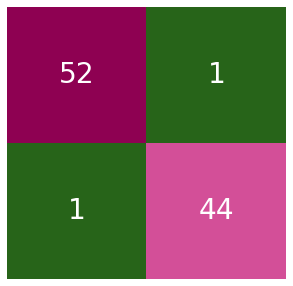

In [367]:
CM_27 = confusion_matrix(b_test, classes_test_pred_binary)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.imshow(CM_27, interpolation = 'none', aspect = 'auto', cmap = 'PiYG_r')
ax1.axis('off')
for (j,i),label in np.ndenumerate(CM_27):
    ax1.text(i,j,label,ha='center', va='center', color='white', size=28)
plt.show()

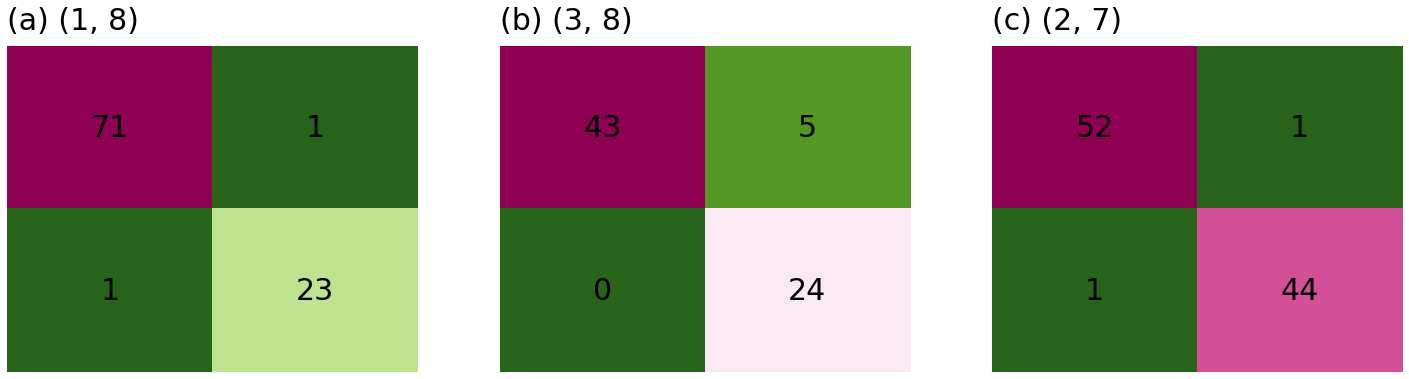

In [368]:
# plotting all three confusion matrices in one figure
# fig1, ax1 = plt.subplots(figsize=(5,5))
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(CM_18, interpolation = 'none', aspect = 'auto', cmap = 'PiYG_r')
ax1.text(-0.5,-0.6,'(a) (1, 8)', fontsize=30)
ax1.axis('off')

ax2.imshow(CM_38, interpolation = 'none', aspect = 'auto', cmap = 'PiYG_r')
ax2.text(-0.5,-0.6,'(b) (3, 8)', fontsize=30)
ax2.axis('off')

ax3.imshow(CM_27, interpolation = 'none', aspect = 'auto', cmap = 'PiYG_r')
ax3.text(-0.5,-0.6,'(c) (2, 7)', fontsize=30)
ax3.axis('off')

for (j,i),label in np.ndenumerate(CM_18):
    ax1.text(i,j,label,ha='center', va='center', color='k', size=30)
for (j,i),label in np.ndenumerate(CM_38):
    ax2.text(i,j,label,ha='center', va='center', color='k', size=30)
for (j,i),label in np.ndenumerate(CM_27):
    ax3.text(i,j,label,ha='center', va='center', color='k', size=30)

plt.savefig('confusionmatrix.png')
plt.show()

#### Acknowledgements
This problem set was completed with help from members of the AMATH 482/582 discord channel as well as TA Katherine Owens. 

#### Links from sklearn documentation
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.predict 
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Alternatively, this homework could be completed using SVD.

In [369]:
# Questions: What is beta and how do we use it?

# Answer from a classmate: 
# If you don’t use the predict function from the ridge regressor 
# you need to physically matrix multiply A_train (with a column 
# of ones appended to the left of it) and the beta vector you 
# get after inserting the intercept.

In [370]:
pca = PCA(n_components = 256)
pca.fit(X_train) #X_train_standard

components = pca.components_

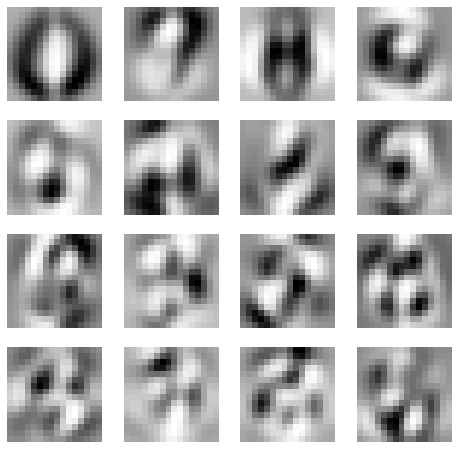

In [371]:
# plot_digits(components[:16,:], 4, "First 16 PCA Modes" )
plot_digits(components, 4)
plt.savefig('task1fig2.pdf')

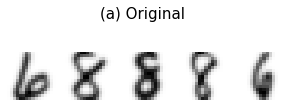

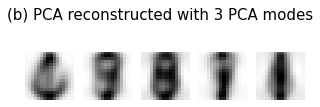

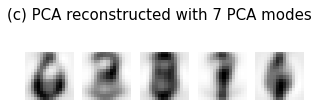

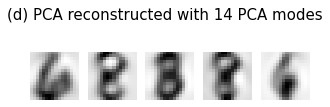

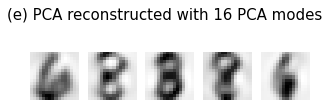

In [372]:
# taken directly from https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import decomposition

n_components = 3
image_shape = (16, 16)

digits = X_train
n_samples, n_features = digits.shape
estimator_3 = decomposition.PCA(n_components=3)
digits_recons_3 = estimator_3.inverse_transform(estimator_3.fit_transform(digits))

estimator_7 = decomposition.PCA(n_components=7)
digits_recons_7 = estimator_7.inverse_transform(estimator_7.fit_transform(digits))

estimator_14 = decomposition.PCA(n_components=14)
digits_recons_14 = estimator_14.inverse_transform(estimator_14.fit_transform(digits))

estimator_16 = decomposition.PCA(n_components=16)
digits_recons_16 = estimator_16.inverse_transform(estimator_16.fit_transform(digits))

# show 5 randomly chosen digits and their PCA reconstructions with 10 dominant eigenvectors
# indices = np.random.choice(n_samples, 5, replace=False)
plt.figure(figsize=(5,2))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(digits[indices[i],:], image_shape), cmap="Greys"), plt.axis('off')
plt.suptitle('(a) Original', size=15)
plt.show()

plt.figure(figsize=(5,2))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(digits_recons_3[indices[i],:], image_shape),cmap="Greys"), plt.axis('off')
plt.suptitle('(b) PCA reconstructed with 3 PCA modes'.format(n_components), size=15)
plt.show()

plt.figure(figsize=(5,2))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(digits_recons_7[indices[i],:], image_shape),cmap="Greys"), plt.axis('off')
plt.suptitle('(c) PCA reconstructed with 7 PCA modes'.format(n_components), size=15)
plt.show()

plt.figure(figsize=(5,2))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(digits_recons_14[indices[i],:], image_shape),cmap="Greys"), plt.axis('off')
plt.suptitle('(d) PCA reconstructed with 14 PCA modes'.format(n_components), size=15)
plt.show()

plt.figure(figsize=(5,2))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(digits_recons_16[indices[i],:], image_shape),cmap="Greys"), plt.axis('off')
plt.suptitle('(e) PCA reconstructed with 16 PCA modes'.format(n_components), size=15)
plt.show()